<a href="https://colab.research.google.com/github/mertz1999/Alzheimer-s-Disease-Prediction/blob/main/Alzh_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Loading packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Loafing Data 
data = pd.read_excel('Data.xlsx')
data = data.drop('ID', axis=1)
data

,LO,Age,SEX,EDU,SE,Hert,smoke,COV,COV-R,Alzh
0,1,62,1,13,2,1,1,1,2,1
1,1,73,0,16,2,1,1,1,2,1
2,1,39,0,6,2,1,0,1,2,1
3,1,60,1,0,2,0,1,1,1,1
4,1,64,0,18,3,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...
3379,6,73,1,10,2,0,0,0,2,0
3380,6,49,1,10,3,0,0,0,2,0
3381,6,51,1,6,3,0,0,0,3,0
3382,6,64,0,12,3,0,0,0,1,0


In [4]:
data['Age'].describe()

count    3384.000000
mean       54.775709
std        11.731764
min        35.000000
25%        45.000000
50%        55.000000
75%        65.000000
max        75.000000
Name: Age, dtype: float64

In [5]:
# Information in train part
data.describe()

,LO,Age,SEX,EDU,SE,Hert,smoke,COV,COV-R,Alzh
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000
mean,3.677009,54.775709,0.498818,8.896868,1.991135,0.153960,0.499409,0.492317,1.958333,0.294917
std,1.704264,11.731764,0.500072,5.432982,0.811121,0.360964,0.500074,0.500015,0.820071,0.456073
min,1.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,45.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,55.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.000000,65.000000,1.000000,14.000000,3.000000,0.000000,1.000000,1.000000,3.000000,1.000000
max,6.000000,75.000000,1.000000,18.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000


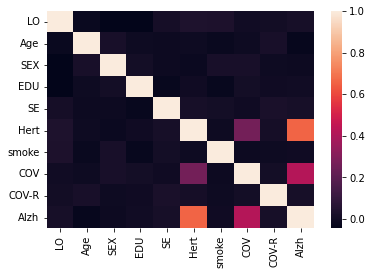

In [6]:
data_corr = data.corr()
sns.heatmap(data_corr)

In [7]:
# Seprate label and feature
labels = data['Alzh']
features = data.drop('Alzh', axis=1)
features = features.drop('SEX', axis=1)

features_list = list(features.columns)


In [8]:
# Train, Test split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, 
    labels, 
    test_size = 0.25, 
    random_state = 42
    )

print("Train: ", len(train_features))
print("Test : ", len(test_features))

Train:  2538
Test :  846


# Random Forest

In [9]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [10]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# --- Find MAE
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', np.mean(errors))


# --- Find accuracy
# set threshold
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

# Which one is correct: 
diff = predictions - np.array(test_labels)
True_pred = len(diff[diff == 0])
print("Accuracy           : ", True_pred/len(diff) * 100)


Mean Absolute Error: 0.20058930822920187
Accuracy           :  83.92434988179669


 --------- Result of Random forest ---------
Random forest precision :  0.6181818181818182
Random forest recall    :  0.845771144278607




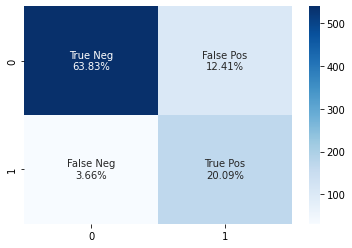

In [11]:
# --- Calculate precision and recall with cf matix
cf_matrix = confusion_matrix(predictions, np.array(test_labels))
precision = precision_score(predictions, np.array(test_labels))
recall    = recall_score(predictions, np.array(test_labels))


# Namee
group_names = ['True Neg',
               'False Pos',
               'False Neg',
               'True Pos']

# find precentages of each confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Make labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Print Info 
print(" --------- Result of Random forest ---------")
print("Random forest precision : ", precision)
print("Random forest recall    : ", recall)
print("\n")

# KNN Algorithms

In [58]:
# Fit model
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(train_features, train_labels)

KNeighborsRegressor(n_neighbors=12)

In [59]:
# Predict test part of dataset
predictions = knn_model.predict(test_features)

In [60]:
# --- Find RMSE
mse = mean_squared_error(test_labels, predictions)
print("MSE                : ", mse)
# --- Find accuracy
# set threshold
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

# Which one is correct: 
diff = predictions - np.array(test_labels)
True_pred = len(diff[diff == 0])
print("Accuracy           : ", True_pred/len(diff) * 100)


MSE                :  0.20645357236669293
Accuracy           :  70.09456264775413


 --------- Result of Random forest ---------
KNN precision :  0.16363636363636364
KNN recall    :  0.6617647058823529




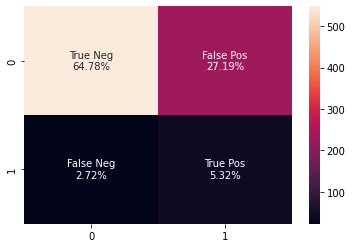

In [63]:
# --- Calculate precision and recall with cf matix
cf_matrix = confusion_matrix(predictions, np.array(test_labels))
precision = precision_score(predictions, np.array(test_labels))
recall    = recall_score(predictions, np.array(test_labels))


# Namee
group_names = ['True Neg',
               'False Pos',
               'False Neg',
               'True Pos']

# find precentages of each confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Make labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='')

# Print Info 
print(" --------- Result of Random forest ---------")
print("KNN precision : ", precision)
print("KNN recall    : ", recall)
print("\n")

# Naive Bayes